# MNIST Classification - Model Comparison

### Import the Libaries

In [1]:
import sklearn
print("sklearn.__version__:", sklearn.__version__)
from sklearn.datasets import fetch_openml
print("fetch_openml import OK")

sklearn.__version__: 1.7.2
fetch_openml import OK


In [2]:
import sys, sklearn
print("Python executable:", sys.executable)
print("sys.path (first entries):", sys.path[:3])
print("sklearn.__file__:", sklearn.__file__)
print("sklearn.__version__:", sklearn.__version__)

Python executable: C:\Users\bbuser\anaconda3\python.exe
sys.path (first entries): ['C:\\Users\\bbuser\\anaconda3\\python313.zip', 'C:\\Users\\bbuser\\anaconda3\\DLLs', 'C:\\Users\\bbuser\\anaconda3\\Lib']
sklearn.__file__: C:\Users\bbuser\anaconda3\Lib\site-packages\sklearn\__init__.py
sklearn.__version__: 1.7.2


In [3]:
import sys
!{sys.executable} -m pip uninstall -y sklearn scikit-learn
!{sys.executable} -m pip install --upgrade pip wheel setuptools
!{sys.executable} -m pip install scikit-learn xgboost

Found existing installation: scikit-learn 1.7.2
Uninstalling scikit-learn-1.7.2:
  Successfully uninstalled scikit-learn-1.7.2


You can safely remove it manually.


   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----- -------------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.2 which is incompatible.


In [4]:
import sklearn
print("sklearn:", sklearn.__version__, "from", sklearn.__file__)
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version=1, as_frame=False)
print("MNIST data shape:", mnist.data.shape, mnist.target.shape)

sklearn: 1.7.2 from C:\Users\bbuser\anaconda3\Lib\site-packages\sklearn\__init__.py
MNIST data shape: (70000, 784) (70000,)


In [ ]:
import sklearn
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix, 
    classification_report, 
    roc_auc_score, 
    roc_curve, 
    precision_recall_curve, 
    average_precision_score
)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
import sklearn
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

print("sklearn", sklearn.__version__)

X, y = fetch_openml("mnist_784", version=1, as_frame=False, return_X_y=True)
X = X / 255.0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LogisticRegression(max_iter=1000, solver='saga', multi_class='multinomial', random_state=42)
clf.fit(X_train, y_train)
print("train acc:", clf.score(X_train, y_train), "test acc:", clf.score(X_test, y_test))

sklearn 1.7.2


C:\Users\bbuser\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


train acc: 0.9396428571428571 test acc: 0.9208571428571428


###  Load Data

In [7]:
import pandas as pd 
data = pd.read_csv(r"C:\Users\bbuser\Desktop\Jupyter\creditcard.csv")

print("Dataset shape:", data.shape)
data.head()

Dataset shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Features and Target

In [8]:
X = data.drop("Class", axis=1)
y = data["Class"]

### Train/Test Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### Normalize Features

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Models

In [15]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(kernel="rbf", probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
}

results = {}
misclassified_samples = {}

### Training & Evaluation


===== Logistic Regression =====
Accuracy: 0.9991397773954567
              precision    recall  f1-score   support

           0     0.9994    0.9998    0.9996     56864
           1     0.8267    0.6327    0.7168        98

    accuracy                         0.9991     56962
   macro avg     0.9130    0.8162    0.8582     56962
weighted avg     0.9991    0.9991    0.9991     56962



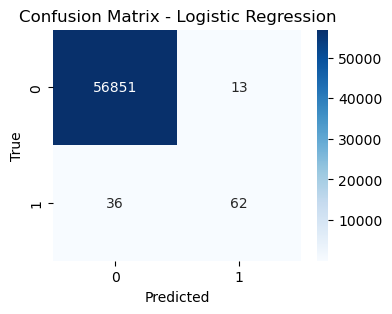


===== SVM =====
Accuracy: 0.999420666409185
              precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997     56864
           1     0.9577    0.6939    0.8047        98

    accuracy                         0.9994     56962
   macro avg     0.9786    0.8469    0.9022     56962
weighted avg     0.9994    0.9994    0.9994     56962



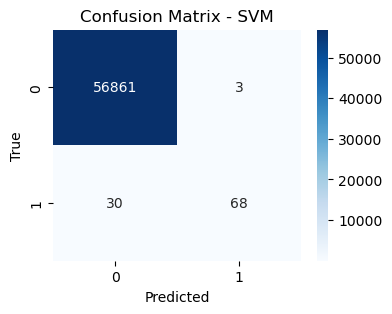


===== Decision Tree =====
Accuracy: 0.9991397773954567
              precision    recall  f1-score   support

           0     0.9996    0.9996    0.9996     56864
           1     0.7526    0.7449    0.7487        98

    accuracy                         0.9991     56962
   macro avg     0.8761    0.8722    0.8741     56962
weighted avg     0.9991    0.9991    0.9991     56962



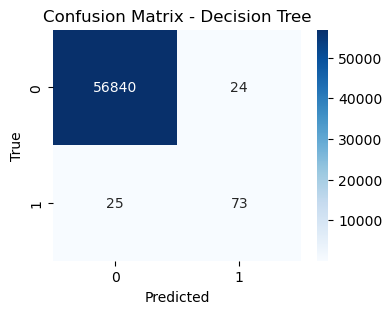


===== Random Forest =====
Accuracy: 0.9995962220427653
              precision    recall  f1-score   support

           0     0.9997    0.9999    0.9998     56864
           1     0.9412    0.8163    0.8743        98

    accuracy                         0.9996     56962
   macro avg     0.9704    0.9081    0.9371     56962
weighted avg     0.9996    0.9996    0.9996     56962



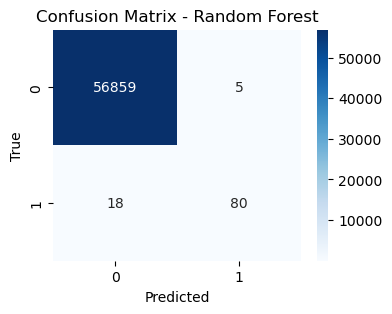


===== XGBoost =====


C:\Users\bbuser\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:20:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9994382219725431
              precision    recall  f1-score   support

           0     0.9996    0.9998    0.9997     56864
           1     0.8667    0.7959    0.8298        98

    accuracy                         0.9994     56962
   macro avg     0.9332    0.8979    0.9148     56962
weighted avg     0.9994    0.9994    0.9994     56962



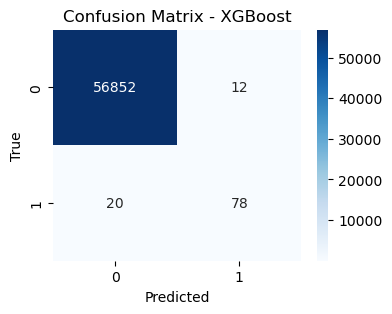

In [22]:
from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix, 
    classification_report, 
    roc_auc_score, 
    roc_curve, 
    precision_recall_curve, 
    average_precision_score
)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

misclassified_samples = {}

for name, model in models.items():
    print(f"\n===== {name} =====")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred, digits=4))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    
    # Store some misclassified samples
    misclassified = np.where(y_test != y_pred)[0][:10]  # first 10 mistakes
    misclassified_samples[name] = (X_test[misclassified], y_test.iloc[misclassified], y_pred[misclassified])

### Accuracy Comparison

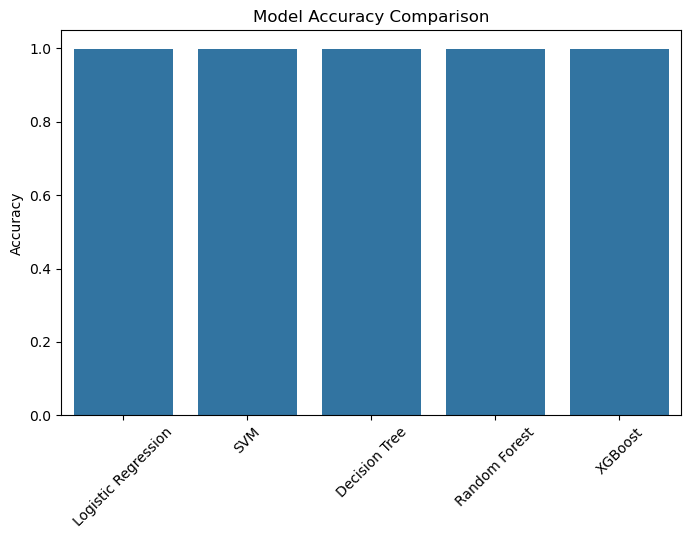

In [23]:
plt.figure(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.show()

### Show Misclassified Samples
### (Tabular data, so we just print instead of images)

In [24]:
for name, (X_mis, y_true, y_pred) in misclassified_samples.items():
    print(f"\n--- Misclassified samples for {name} ---")
    for i in range(len(X_mis)):
        print(f"True: {y_true.iloc[i]}, Predicted: {y_pred[i]}, Features: {X_mis[i][:5]}...")  # print first 5 features


--- Misclassified samples for Logistic Regression ---
True: 0, Predicted: 1, Features: [ -1.44599992  -9.1639347    6.7113123  -13.68866016   4.29105504]...
True: 0, Predicted: 1, Features: [-1.39122855 -1.11391727  2.07561841 -4.37413156  2.89308495]...
True: 1, Predicted: 0, Features: [-1.08218407 -0.65287619  0.43461735 -0.75424304  0.15384566]...
True: 0, Predicted: 1, Features: [-1.54791974 -3.36871158  3.8127405  -7.65652386  4.1245581 ]...
True: 1, Predicted: 0, Features: [-1.03907873 -0.77595709  1.40015112 -0.99203272  1.45785213]...
True: 1, Predicted: 0, Features: [ 0.84673271  0.11828816  0.56966291 -3.06700358  2.17525375]...
True: 1, Predicted: 0, Features: [-0.86227733 -1.04312693  0.95450235 -1.56555573 -0.40445743]...
True: 1, Predicted: 0, Features: [ 1.00982548 -1.84522261 -0.55888725 -3.1343884   2.38230587]...
True: 1, Predicted: 0, Features: [-1.73710314 -2.07501964  1.88068464 -0.78408473  2.30576703]...
True: 1, Predicted: 0, Features: [ 0.03857594 -1.89219004 